# Numerical project: Solving differential equation in Finance


## **The model**



```
The goal of this section is to explain the Black-Scholes equation’s mathematical foundation, underlying assumptions and implications.
```



**The Black-Scholes-Merton option pricing formula:** 

-----
- What we are doing? 

Before we get into the nitty gritty of the model itself, we have to talk about where it comes from, and why it matters.

The Black–Scholes model is a mathematical model simulating the dynamics of a financial market containing derivative financial instruments. Since its introduction in 1973 and refinement in the 1970s and 80s, the model has become the *de-facto standard* for **estimating the price of stock options**. The key idea behind the model is **to hedge the options** in an investment portfolio by buying and selling the underlying asset (such as a stock) in just the right way and as a consequence, eliminate risk. The method has later become known within finance as “continuously revised delta hedging”, and been adopted by many of the world’s foremost investment banks and hedge funds.

- What's the Black-Scholes model? (Simplifying)

The Black–Scholes model is a **mathematical model simulating** the dynamics of a financial market containing derivative financial instruments such as **options**. The model is based on a **partial differential equation (PDE)**, the so-called **Black-Scholes equation**, from which one can deduce the Black-Scholes formula, which gives a **theoretical estimate of the correct price of European stock options.**

---------


*So far, we faced many ugly, complicated and technical terms. My advice is just take baby steps.*

Before we dive in this model, let's define the basic ingredients...

**What is an option?**

*Options are a form of derivative contract that gives buyers of the contracts (the option holders) the right (but not the obligation) to buy or sell a security at a chosen price at some point in the future. Option buyers are charged an amount called a premium by the sellers for such a right.*

There a two types of options: **put** and **call**.





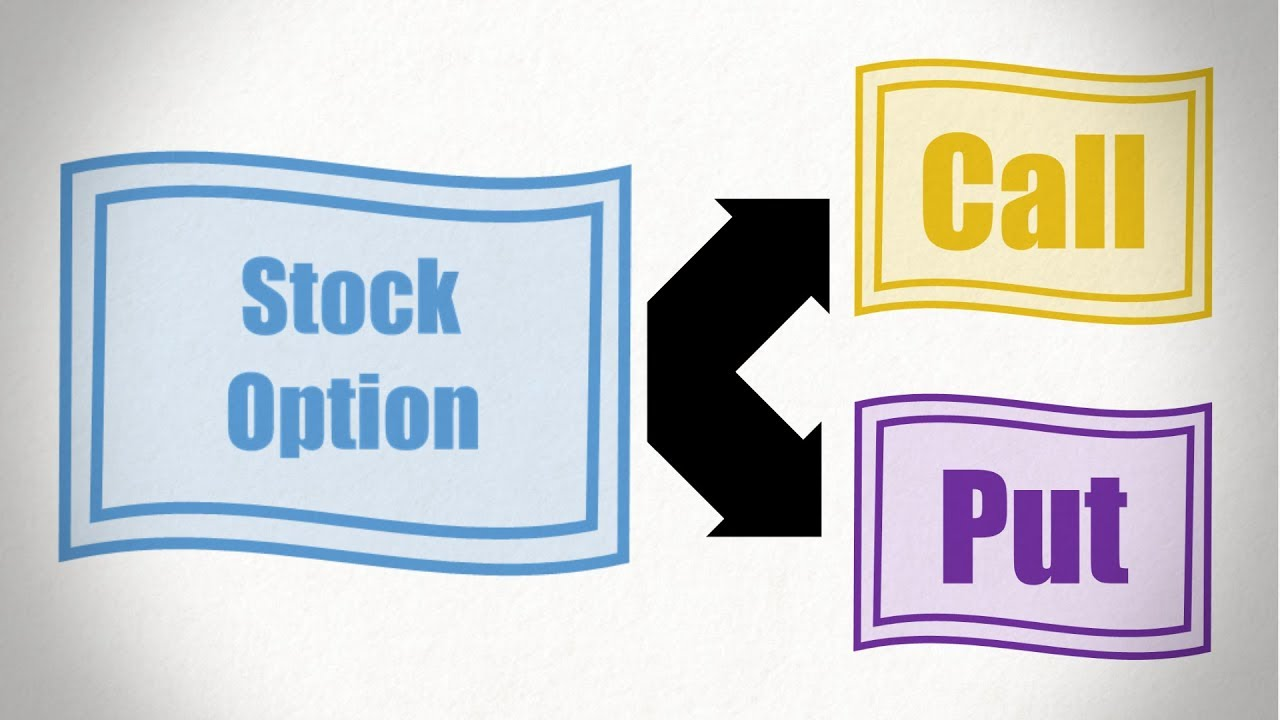

- If you think the **price of an asset will rise**, you can **buy a call option** using less capital than the asset itself. At the same time, if the price instead falls, your losses are limited to the premium paid for the options and no more.

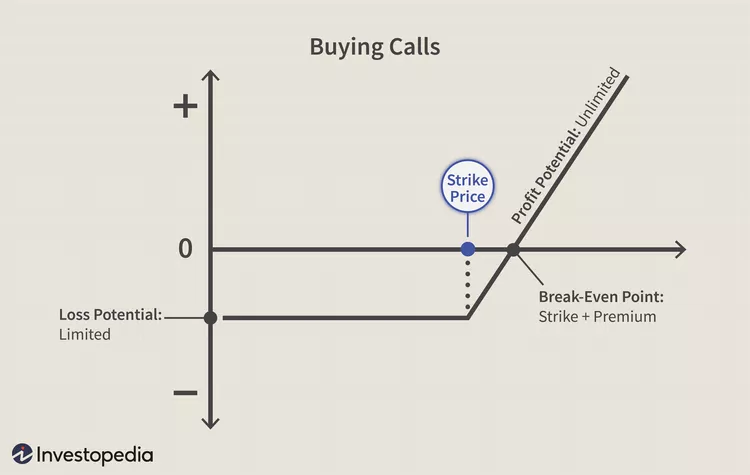

- If you thing the **price of an asset will decline**, you can **buy a put option**. A put option gives the holder the right to sell the underlying at a set price. Preferred strategy for who are bearish on a particular stock (but also ETF, or index) but want to take on less risk than with a short-selling strategy (considered high risk strategy).

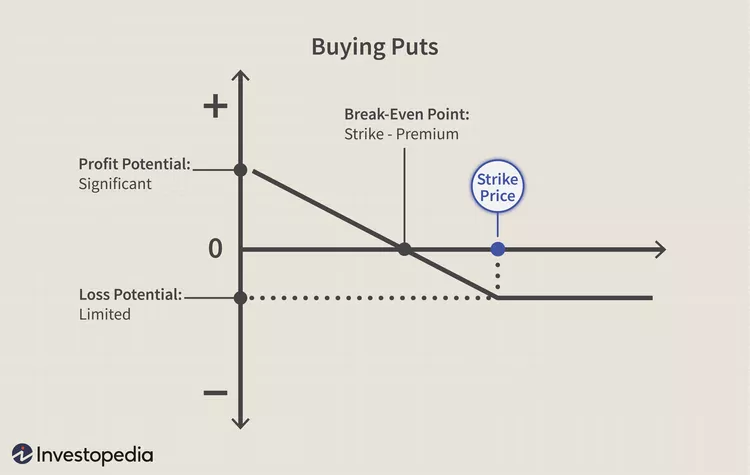


*Summarizing: if you don't like risk you consider options.*

------

-----
```
We will focus on: European call option.
```
A **European call option** gives the owner the right to acquire the underlying security at expiry. For an investor to profit from a call option, the stock's price, at expiry, has to be trading high enough above the strike price to cover the cost of the option premium.

-----

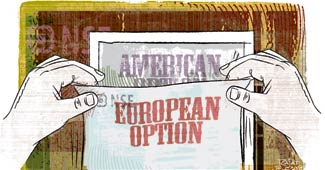

Summarizing: 

- What we are interested in? **Option pricing**
- What type of option? Call option $⇑$ Bullish market
- When I can exercise the option? (European option) At the **expiration time**, if it's convenient.
- What model do I use to price the option in the meanwhile? **Black-Scholes model**
- Why do I need to price the option in the meanwhile? It helps to develope risk-free strategies $→$ buying the underlying asset $ ≡ $ **Hedging**

**The equation**

Pricing an option can be done using the Black-Scholes partial differential equation (BS PDE).


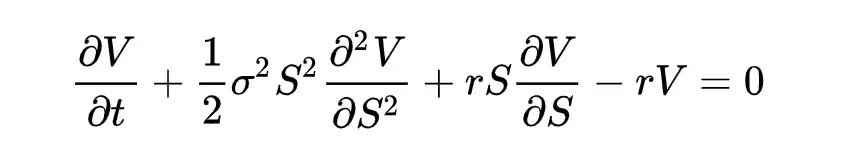



> *The BS PDE can be derived by applying Ito’s Lemma to geometric Brownian motion and then setting the necessary conditions to satisfy the continuous-time delta hedging.*



> S : current asset(stock) price

> r: risk free rate 

>σ: annualized volatility of the asset's returns 

For boundary conditions:

>K: strike price of the option

>T : time until option expiration 

**Assumptions:**

There are a number of important assumptions to consider when viewing the formulae below. 
 

1) **Interest rate** is known and **constant** through time. 

2) The **stock** follows a **random walk in continuous time**, the variance of the stock price paths follow a log-normal distribution. 

3) **Volatility** is **constant** 

4) Stock pays no dividends (can be modified to include them however)

5) **The option can only be exercised at expiration i.e. it is a European type option.**

6) No transaction costs i.e. fees on shorting selling etc. 

7) Fractional trading is possible i.e. we can buy/sell 0.x of any given stock. 

**Solution of the problem:**

- **Analytical:** $∃$ an analytical solution.
- **Numerical**: we aim to integrate the PDE numerically using different techniques.

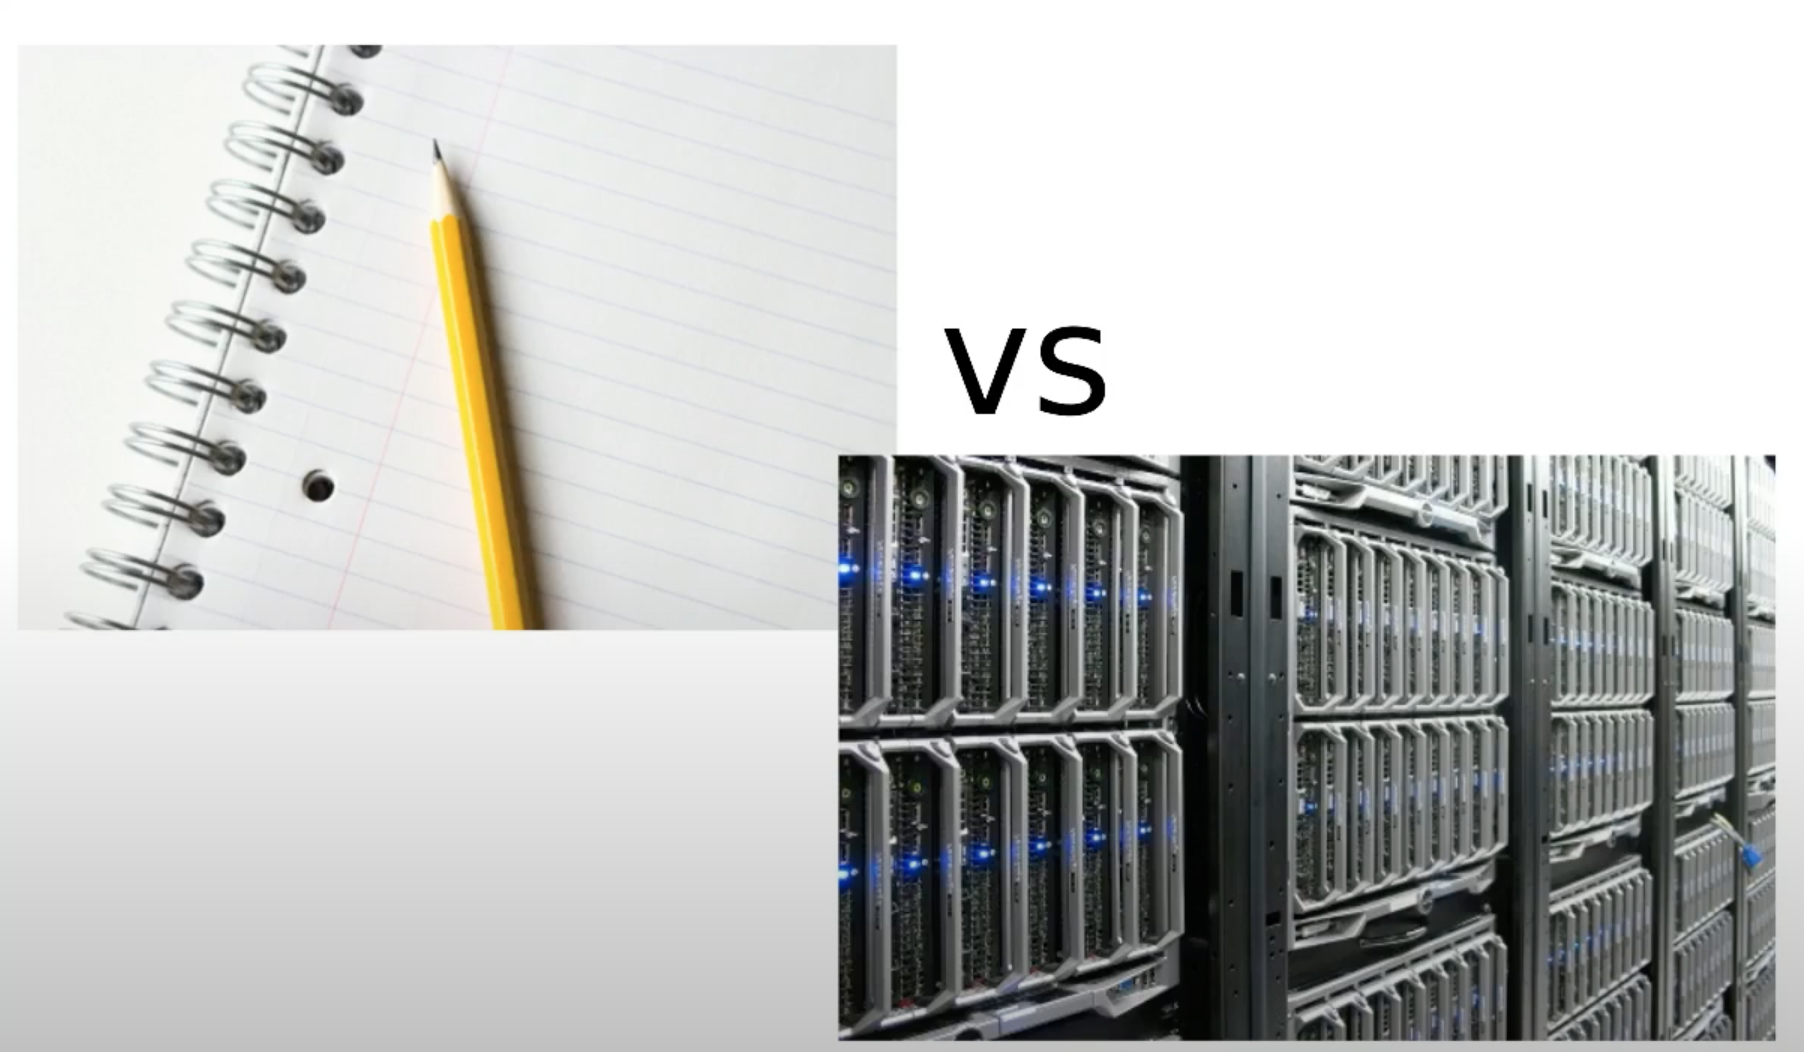

**Boundary conditions**


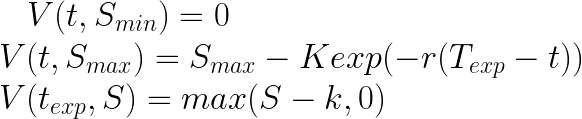

## **Analytical Solution:**

###Introduction 

*The analytical solution of this model is called the Black-Scholes-Merton option pricing formula. It is long, ugly, and confusing. It doesn’t even give an intuition for pricing options. The derivation of it is so difficult that Scholes and Merton received a Nobel prize for it in 1997 (Black died in 1995). It relies on the Feynman-Kac theorem and risk-neutral measures, but I will not get into it.*

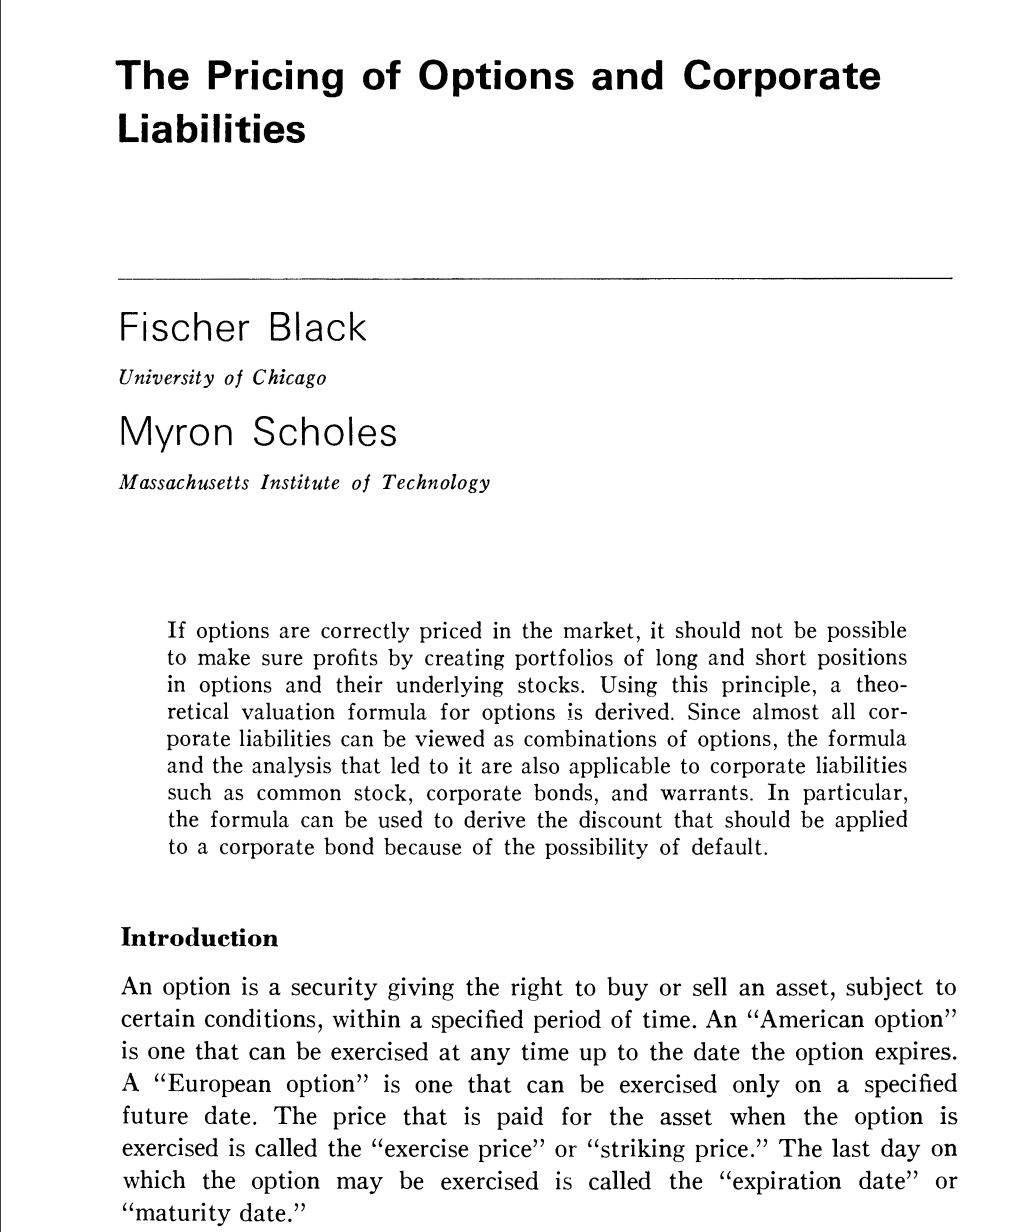



> The formulae/**solution** for both the put and the call is given below. 

 



$$ Call = S_{0}N(d_1) - N(d_2)Ke^{-rT} $$
$$ Put=N(-d_2)Ke^{-rT} - N(-d_1)S_0 $$

with: 

$ \\d_1 = \frac{ln(\frac{S}{K}) + (r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}} \\ \\d_2 =d_1 - \sigma\sqrt{T} $

### Code

In [ ]:
# Importing

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import math
import random as rd
import scipy.constants as sc
import time

In [ ]:
# Functions

N_dist = norm.cdf #cumulative distribution function

def call(S, K, Tau, r, sigma):
    ''' notice that Tau is the time after which our option will expire, namely:  T_exp - t_current'''

    d1 = (np.log(S/K) + (r + sigma**2/2)*Tau) / (sigma*np.sqrt(Tau))
    d2 = d1 - sigma * np.sqrt(Tau)
    return S * N_dist(d1) - K * np.exp(-r*Tau)* N_dist(d2)

def put(S, K, Tau, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*Tau) / (sigma*np.sqrt(Tau))
    d2 = d1 - sigma* np.sqrt(Tau)
    return K*np.exp(-r*Tau)*N_dist(-d2) - S*N_dist(-d1)

**Baseline Values unless indicated otherwise:**

K = 100  #strike price

S = 120   # stock price at current time

r = 0.1 # risk-free interest

T_exp = 10 # expiration time

T = 7 # current timestep

sigma = 0.3 # volatility



In [ ]:
def baseline_values():

  """ define the baseline values for investigatin parameters """
  K = 100  #strike price
  S = 120   # stock price at current time
  r = 0.1 # risk-free interest

  T_exp = 10 # expiration time
  T = 7 # current timestep
  sigma = 0.3 # volatility
  return K, S, r, T_exp, T, sigma


# Defining parameters
K, S, r, T_exp, T, sigma = baseline_values()

#### Dependence on S

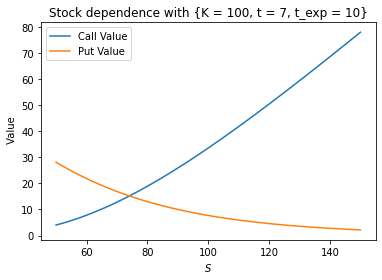

In [ ]:
S = np.arange(50,150,0.1) # Interval of definition of S -> should be defined around the K value

# Calls and puts
Tau = (T_exp-T)
calls = [call(s, K, Tau, r, sigma) for s in S]
puts = [put(s, K, Tau, r, sigma) for s in S]

# Plotting
plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.title("Stock dependence with {K = 100, t = 7, t_exp = 10}")
plt.xlabel('$S$')
plt.ylabel(' Value')
plt.legend()

Let's plot now how the this dependence varies on time.

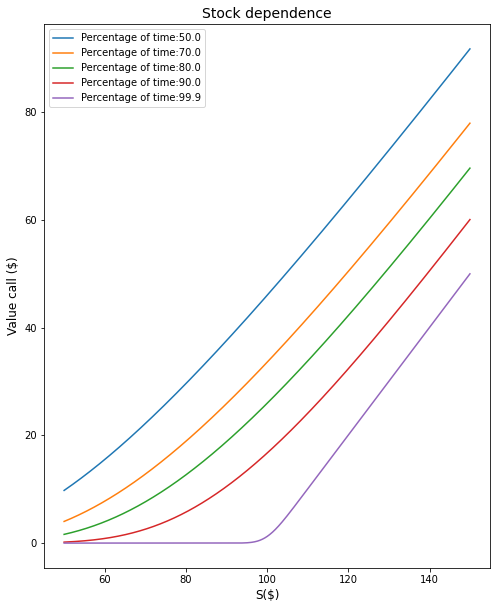

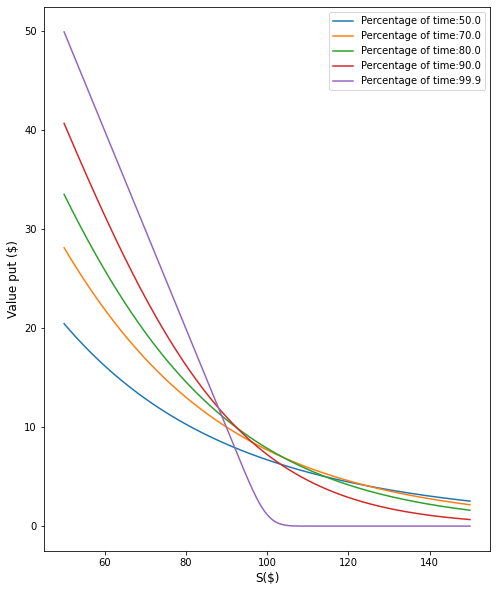

In [ ]:
def plot_S_dep(call, put):
    plt.figure(figsize=(8,10))
    plt.title('Stock dependence',fontsize=14);
    S = np.arange(50,150,0.1) # Interval of definition of S -> should be defined around the K value
    TT = [5,7,8,9,9.99]

    for t in TT:
        Tau = (T_exp-t)
        calls = [call(s, K, Tau, r, sigma) for s in S]
        puts = [put(s, K, Tau, r, sigma) for s in S]
        perc = round((t/10)*100, 4)

        plt.plot(S,calls, label="Percentage of time:"+str(perc))

        plt.xlabel('S($)',fontsize=12, )
        plt.ylabel('Value call ($)',fontsize=12)

    plt.subplots_adjust( hspace=0.8)
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,10))
    for t in TT:
        Tau = (T_exp-t)
        puts = [put(s, K, Tau, r, sigma) for s in S]
        perc = round((t/10)*100, 4)

        plt.plot(S,puts, label="Percentage of time:"+str(perc))

        plt.xlabel('S($)',fontsize=12, )
        plt.ylabel('Value put ($)',fontsize=12)

    plt.subplots_adjust( hspace=0.8)
    plt.legend()
    plt.show()

plot_S_dep(call,put)

#### Dependence on sigma

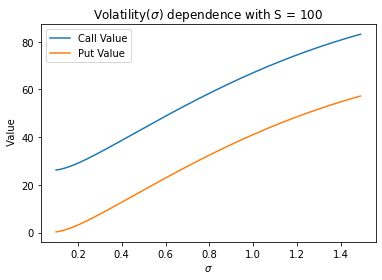

In [ ]:
# Defining parameters
K, S, r, T_exp, T, sigma = baseline_values()
S = 100

Sigmas = np.arange(0.1, 1.5, 0.01)
calls = [call(S, K, (T_exp-T), r, sig) for sig in Sigmas]
puts = [put(S, K, (T_exp-T), r, sig) for sig in Sigmas]
plt.plot(Sigmas, calls, label='Call Value')
plt.plot(Sigmas, puts, label='Put Value')
plt.title("Volatility($\sigma$) dependence with S = 100")

plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.legend()

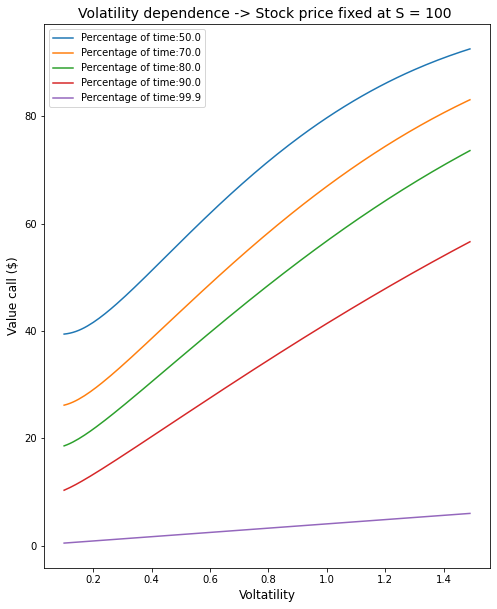

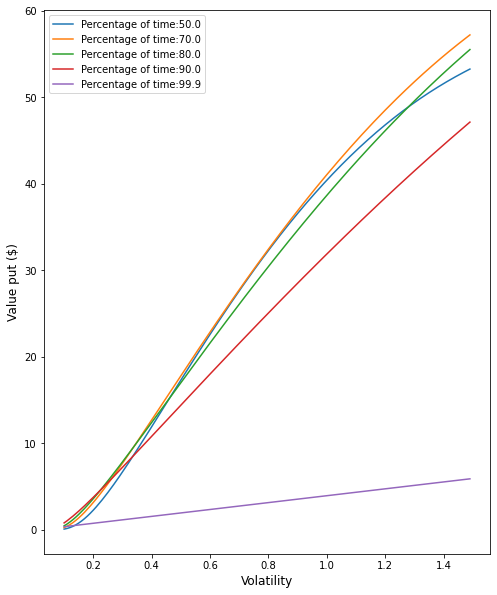

In [ ]:
S = 100
def plot_sig_dep(call, put):
    plt.figure(figsize=(8,10))
    plt.title('Volatility dependence -> Stock price fixed at S = {0} '.format(S),fontsize=14);
    Sigmas = np.arange(0.1, 1.5, 0.01)
    TT = [5,7,8,9,9.99]

    for t in TT:
        Tau = (T_exp-t)
        calls = [call(S, K, Tau, r, sig) for sig in Sigmas]
        perc = round((t/10)*100, 4)

        plt.plot(Sigmas,calls, label="Percentage of time:"+str(perc))

        plt.xlabel('Voltatility',fontsize=12, )
        plt.ylabel('Value call ($)',fontsize=12)

    plt.subplots_adjust( hspace=0.8)
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,10))
    for t in TT:
        Tau = (T_exp-t)
        puts = [put(S, K, Tau, r, sig) for sig in Sigmas]
        perc = round((t/10)*100, 4)

        plt.plot(Sigmas,puts, label="Percentage of time:"+str(perc))

        plt.xlabel('Volatility',fontsize=12, )
        plt.ylabel('Value put ($)',fontsize=12)

    plt.subplots_adjust( hspace=0.8)
    plt.legend()
    plt.show()

plot_sig_dep(call,put)

#### Dependence on Time

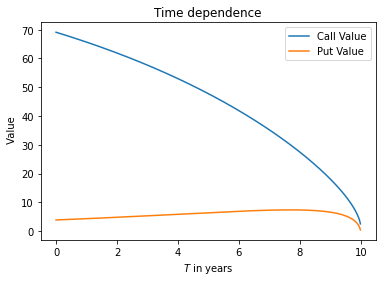

In [ ]:
K, S, r, T_exp, T, sigma = baseline_values()
T = np.arange(0, 10, 0.01)
S = 102
calls = [call(S, K, (T_exp - t), r, sigma) for t in T]
puts = [put(S, K, (T_exp - t), r, sigma) for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts, label='Put Value')
plt.title("Time dependence")

plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.legend()

Let's plot the evolution in time for different value of the price of the stock.

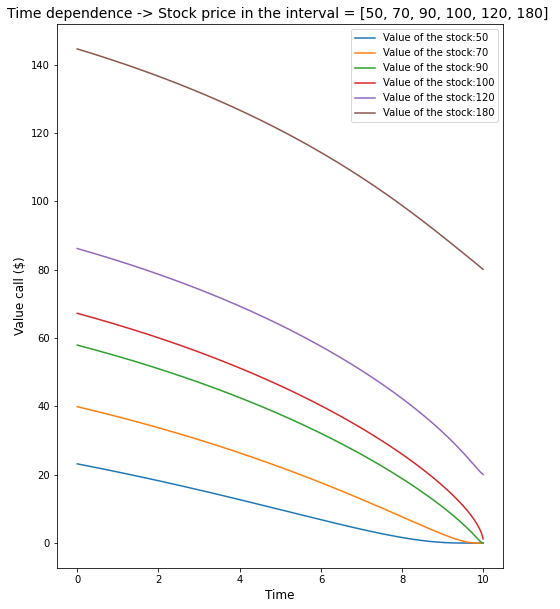

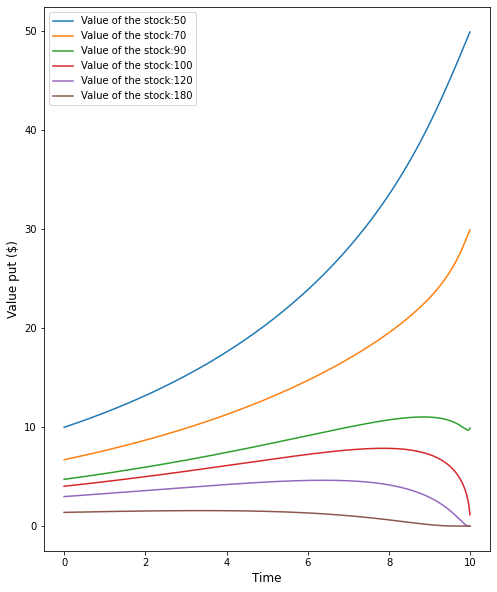

In [ ]:
def plot_time_dep(call, put):
    SS = [50,70,90,100,120,180]
    plt.figure(figsize=(8,10))
    plt.title('Time dependence -> Stock price in the interval = {0} '.format(SS),fontsize=14);
    T = np.arange(0, 10, 0.01)

    for S in SS:
        # Tau = (T_exp-t)
        calls = [call(S, K, (T_exp - t), r, sigma) for t in T]

        plt.plot(T,calls, label="Value of the stock:"+str(S))
        plt.xlabel('Time',fontsize=12, )
        plt.ylabel('Value call ($)',fontsize=12)

    plt.subplots_adjust( hspace=0.8)
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,10))
    for S in SS:
        # Tau = (T_exp-t)
        puts = [put(S, K, (T_exp - t), r, sigma) for t in T]

        plt.plot(T,puts, label="Value of the stock:"+str(S))
        plt.xlabel('Time',fontsize=12)
        plt.ylabel('Value put ($)',fontsize=12)

    plt.subplots_adjust( hspace=0.8)
    plt.legend()
    plt.show()

plot_time_dep(call,put)

#### Dependence on S and Time:

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Defining parameters
K = 100 
r = 0.01
T_exp = 100 #expiration time
T = np.arange(0,100,2)
S = np.arange(50,150,2)

sigma = 0.02

len(T), len(S)

(50, 50)

In [ ]:
calls = np.zeros((len(T), len(S)))
puts = np.zeros((len(T), len(S)))
for i in range(len(T)):
  for j in range(len(S)):
    calls[i,j] = call(S[j], K, (T_exp-T[i]), r, sigma)
    puts[i,j] = put(S[j], K, (T_exp-T[i]), r, sigma)

calls[30,0]

0.02542665861596105

**Call option**

(50, 50)


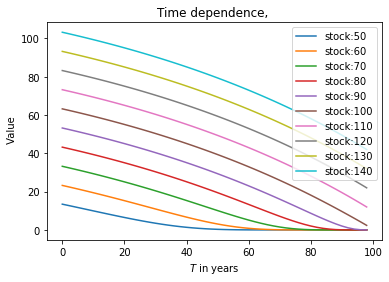

In [ ]:
print(calls.shape)
for i in range(10):
  perc = str(i*5)
  plt.plot(T, calls[:,i*5], label='stock:'+str(S[i*5]))
plt.title("Time dependence, ")

plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.legend()

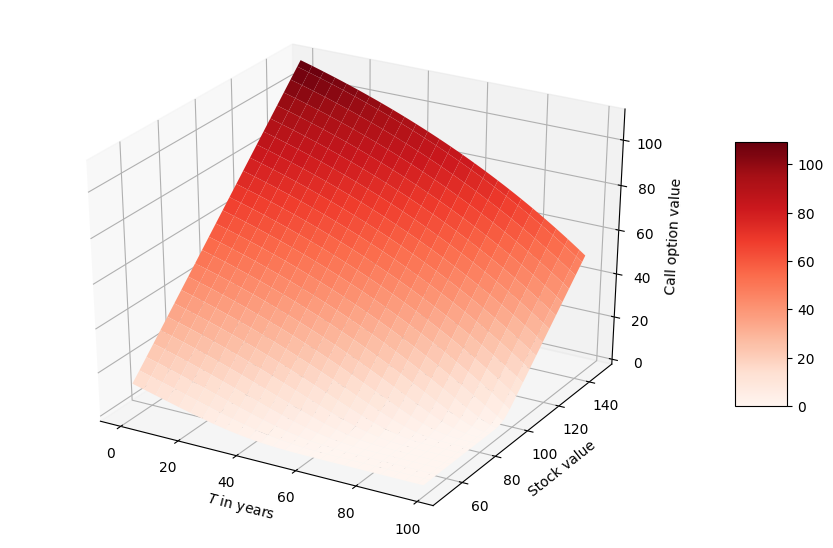

In [ ]:
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
# calls = np.random.rand(len(T), len(S)))
# print(calls.shape)

fig = plt.figure(figsize = (11,7),dpi = 100)
ax = plt.subplot(projection = '3d')
X, Y = np.meshgrid(T, S) 

surf = ax.plot_surface(X, Y, calls.T,  rstride = 2, cstride = 2, cmap=cm.Reds)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
'''
https://matplotlib.org/stable/tutorials/colors/colormaps.html
'''

ax.set_xlabel('$T$ in years')
ax.set_ylabel('Stock value')
ax.set_zlabel("Call option value ")
plt.show()

**Put option**

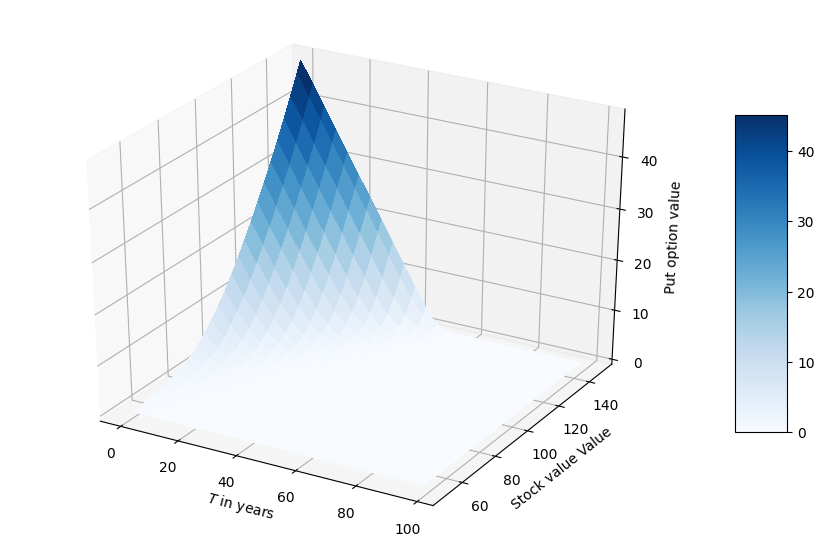

In [ ]:
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(11,7))
fig = plt.figure(figsize = (11,7),dpi = 100)
ax = plt.subplot(projection = '3d')
X, Y = np.meshgrid(T, S)
surf1 = ax.plot_surface(X, Y, puts, rstride = 2, cstride = 2, cmap=cm.Blues, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf1, shrink=0.6, aspect=6)

ax.set_xlabel('$T$ in years')
ax.set_ylabel('Stock value Value')
ax.set_zlabel("Put option value ")
plt.show()

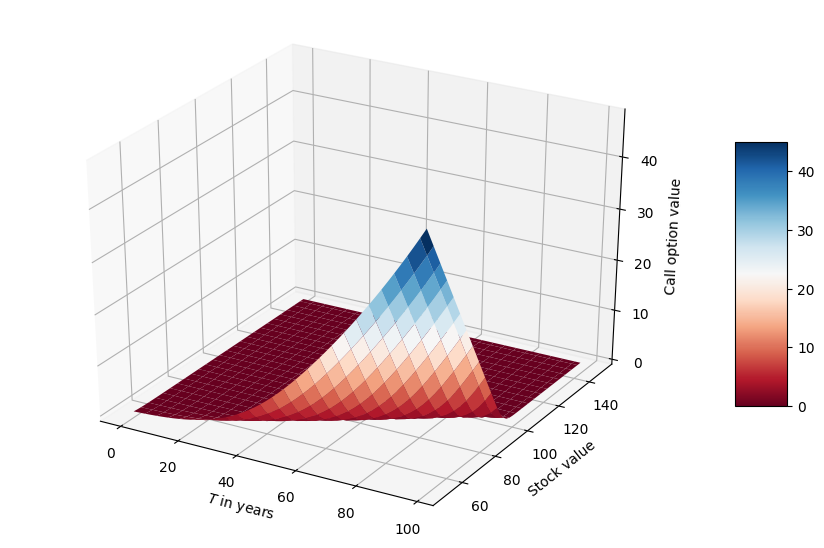

In [ ]:
fig = plt.figure(figsize = (11,7),dpi = 100)
ax = plt.subplot(projection = '3d')
X, Y = np.meshgrid(T, S) 
surf1 = ax.plot_surface(X, Y, puts.T,  rstride = 2, cstride = 2, cmap=cm.RdBu)
fig.colorbar(surf1, shrink=0.5, aspect=5)

ax.set_xlabel('$T$ in years')
ax.set_ylabel('Stock value')
ax.set_zlabel("Call option value ")

plt.show()

## **Numerical Solution**

### Introduction

*We will solve this equation numerically now. The main advantage of this method is that it bypasses very complicated analytical calculations with numerical methods*

Our goal is to integrate the model using two different numerical methods:
 
- Finite difference **explicit** method
- Finite difference **implicit** method 

### Integration

#### **Explicit method:**

I will be using the finite difference method.

Theoretical solution $V_{real}$ of Black-Scholes equation is defined on the continuous space. In contrast, the approximation solution $V_{approx}$ derived from the discretization of the equation is only defined for the nodes. By controlling the parameters $S_{max}, M, N$ , discretization error can be reduced such that $V_{real}$ is closer to $V_{approx}$.


##### 1. Grid

At first is necessary to set up a **grid of points**.

This grid will be used to integrate the PDE from point to point. The grid on the x-axis will represent the discretized times, which ranges from $[0,10]$ and the y-axis will represent the possible stock prices, ranging from $[S_{min},S_{max}]$ . 

Our goal is to determine the option price above each point on the grid.

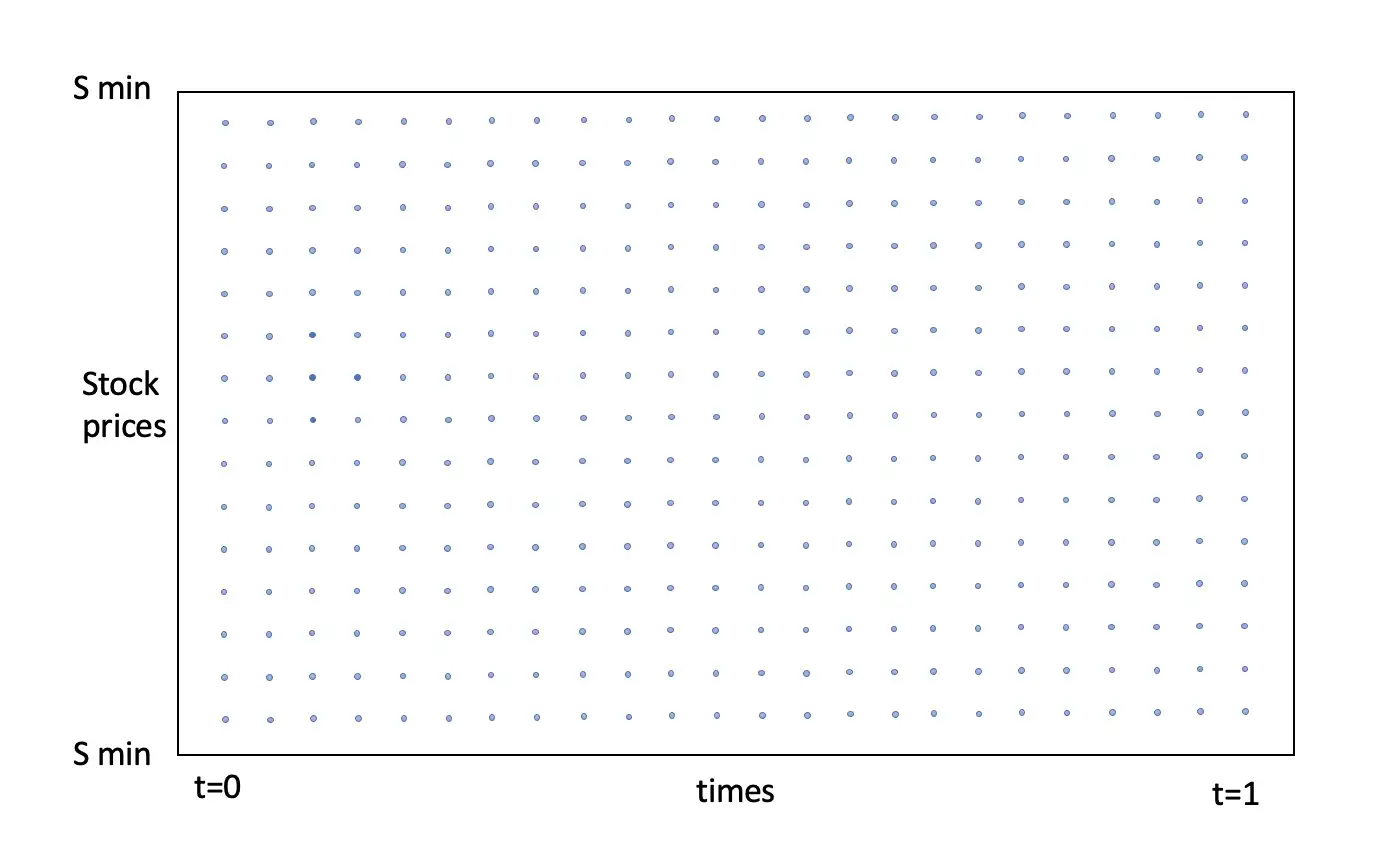

##### 2. Boundary conditions

 Our idea is to **simulate the equation backward**, since in our boundary conditions we have $V(1,0)$ for the last boundary of the grid.


 To integrate then we need to determine 3 boundaries (edge) conditions of the grid. In our case, we can do this for the top, the bottom, and the last boundary of the grid. 
 
 
 >The **bottom** is the easiest, we will set $S_{min}=0$ . 
 
 >The top condition is a bit more tricky. We choose it to be well above the option’s strike price K to ensure the option’s value $V = max( S-K, 0)$ will always (with negligible probability of not happening $p < 0.0001$) payout $S-K$. We can do this by setting $S_{max}$ 8 standard deviations away from the mean, as the stock price is log-normally distributed. So, if we take $S_{max}=8 sigma(T-t)^{0.5}$ , we have ensured that property.

> The option value V at $S_{max}$ can be deducted using a replication argument. If a derivative pays $S-K$ at time t, we can replicate it by purchasing 1 unit of stock and putting $e^{(-r(1-t)}K$ it into a risk-free bank account. So this makes the value of the option for large S: $V(t,S_{max})= S_{max} — e^{(-r(1-t)}K $.

The final boundary condition will be the European call option’s payoff, as that will give the exact value for the option. So the three boundary conditions are:

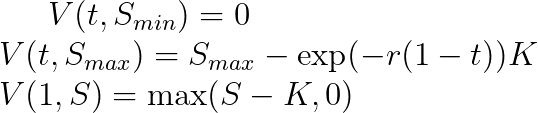

##### 3. Derivative estimation 

From our PDE equation:

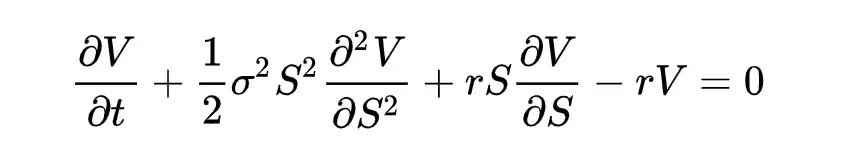

Once we have discretized space, we can use **central difference estimates** for the derivatives of the BS PDE (the delta and gamma from the greeks).

--------

APPENDIX: **The greeks**

> "The Greeks" measure the sensitivity of the value of a derivative product or a financial portfolio to changes in parameter values while holding the other parameters fixed. They are partial derivatives of the price with respect to the parameter values. 

> The Greeks are important not only in the mathematical theory of finance, but also for those actively trading. Financial institutions will typically set (risk) limit values for each of the Greeks that their traders must not exceed

>Delta is the most important Greek since this usually confers the largest risk. Many traders will zero their delta at the end of the day if they are not speculating on the direction of the market and following a delta-neutral hedging approach as defined by Black–Scholes. When a trader seeks to establish an effective delta-hedge for a portfolio, the trader may also seek to neutralize the portfolio's gamma, as this will ensure that the hedge will be effective over a wider range of underlying price movements.



https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model



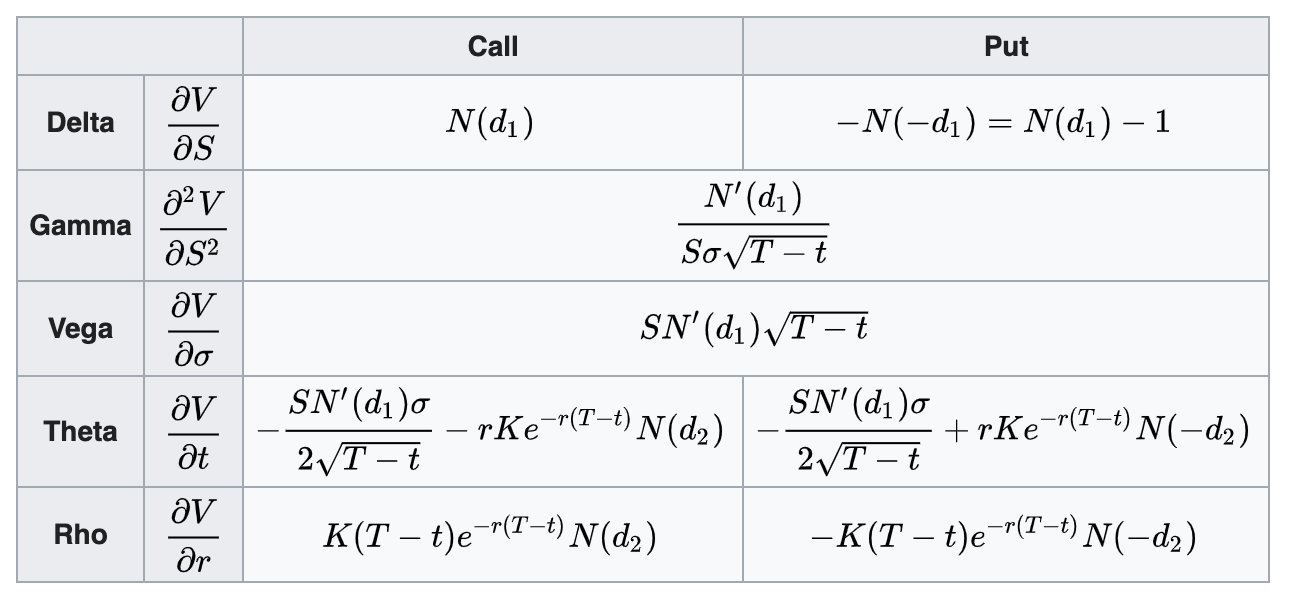




---


**Central difference estimates** for derivatives:

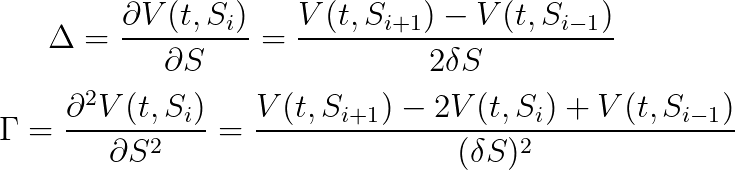

We remind that:

- Central difference for a first order derivative (Δ) is a second order method $O(δS^2)$

- Central difference for the second order derivative (Γ) is a second order method $O(δS^2)$
 

For the **time derivative** as announced before we use a first order backward difference. (see boundary conditions)

$$ \frac{\partial V(t_n, S_i)}{\partial t} \approx \frac{V(t_{n},S_i) - V(t_{n-1},S_i)}{dt} + O(dt) $$  

##### 4. Building the solver

Plugging these into the Black-Scholes PDE, we get:



$$ \frac{V(t_{n},S_i) - V(t_{n-1},S_i)}{dt} +  \frac{\sigma^2 S_i^2}{2}\frac{V(t_n,S_{i+1}) - 2V(t_n, S_i) + V(t_n, S_{i-1})}{\delta S^2} + rS_i\frac{V(t_n,S_{i+1}) - V(t_n, S_{i-1})}{2 \delta S}  - rV(t_n, S_i) ≈ 0 $$

Isolating $V(t_{n-1},S_i)$ we get our **solver** for our **finite difference explicit backward method**:

$$ V(t_{n-1}, S_i) \approx V(t_n, S_i)[1- \frac{dt \sigma^2 S_i^2}{\delta S^2} - r\delta t] + V(t_n, S_{i+1})[\frac{dt \sigma^2 S_i^2}{2 \delta S^2} + \frac{r S_i\delta t}{2\delta S}] + V(t_n, S_{i-1})[\frac{dt \sigma^2 S_i^2}{2 \delta S^2} - \frac{r S_i\delta t}{2\delta S}]$$

in order to simplify the notation we will re-express it as:

$$ V(t_{n-1}, S_i) \approx ΑV(t_n, S_i) + Β V(t_n, S_{i+1}) + Γ V(t_n, S_{i-1})$$




This is a system of ODEs, where V is the column vector of option prices at each timestep.

By iterating the above process we can simulate the above grid by going one step at a time. Note, that as we know the **final boundary condition** and not the first, we will be actually **be going back in time**.

##### 5. Let's code it

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# boundary conditions
def bottom_boundary_condition(t):
    return np.zeros(t.shape)
def top_boundary_condition(K,T,S_max, r, t):
    return S_max-np.exp(-r*(T-t))*K
def final_boundary_condition(K,T,S, r, t):
    return np.maximum(S-K,0)

In [ ]:
def compute_coefficients(K, T, sigma, r, S_i, dt, dS):
    Alpha = 1 - dt*(sigma**2)*S_i**2/(dS**2) - r*dt
    Beta = (dt*(sigma**2)*S_i**2)/(2*dS**2) + dt*r*S_i/(2*dS)
    Gamma = (dt*(sigma**2)*S_i**2)/(2*dS**2) - dt*r*S_i/(2*dS)
    return Alpha, Beta, Gamma

In [ ]:
def price_call_explicit( K, T, r, sigma, N, M):
    '''
    # N is the number of time cells
    # M is the number of stock price cells

    It returns the vector V, which contains the value of the call option for each value of the grid. (in time and stock price phase space)
    '''
    ## Shape of the grid
    #time
    dt = T/N
    #stock
    S_min= 0
    S_max=K*np.exp(8*sigma*np.sqrt(T)) 
    dS = (S_max-S_min)/M

    ## Initialize V 
    S = np.linspace(S_min,S_max,M+1)
    t = np.linspace(0,T,N+1)
    V = np.zeros((N+1,M+1)) 
    # set the boundary conditions
    V[-1,:] = [final_boundary_condition(K,T,S[j], r, t) for j in range(M+1)] 
    V[:,-1] = [top_boundary_condition(K,T,S_max, r, t[i]) for i in range(N+1)]
    V[:,0] = bottom_boundary_condition(t)

    ## Update
    # print("len", len(S))
    for i in range(N,0,-1):
        for j in range(1,M):
          a, b, c = compute_coefficients(K, T, sigma, r, S[j], dt, dS)
          V[i-1,j] = a*V[i,j]  +b*V[i,j+1]  +c*V[i,j-1]
          # print(j, j-1, j+1)
          #print("the value of the option at time {0} for stock price 90 is {2} ")

    return t, S, V

In [ ]:
def baseline_values_num():

  """ define the baseline values for investigatin parameters """
  K = 100  #strike price
  r = 0.01 # risk-free interest
  sigma = 0.02 # volatility
  T = 10 # expiration time
  return K, r, sigma, T


## Defining parameters
K, r, sigma, T = baseline_values_num()

In [ ]:
N, M = 150,150
import scipy
t, S, V = price_call_explicit(K, T, r, sigma, N, M)

In [ ]:
# plt.plot(t, V[:,1])
print(t.shape, S.shape, V.shape)

(151,) (151,) (151, 151)


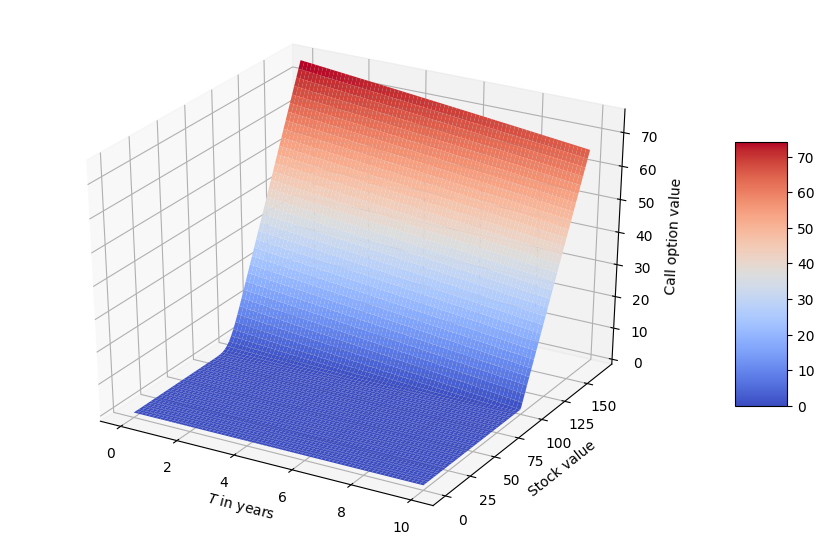

In [ ]:
fig = plt.figure(figsize = (11,7),dpi = 100)
ax = plt.subplot(projection = '3d')
X, Y = np.meshgrid(t, S) 
surf = ax.plot_surface(X, Y, V.T,  rstride = 2, cstride = 2, cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$T$ in years')
ax.set_ylabel('Stock value')
ax.set_zlabel("Call option value ")

plt.show()

#### **Implicit method**

The discretized equation becomes

$$ \begin{aligned}
\frac{V^{n+1}_{i} -V^{n}_{i}}{\Delta t} + 
(r S_i) \frac{V^{n}_{i+1} -V^{n}_{i-1}}{ 2 \Delta S}
+ \frac{1}{2} \sigma^2 S_i^2 \frac{V^{n}_{i+1} + V^{n}_{i-1} - 2 V^{n}_{i}}{\Delta S^2}  - r V^{n}_i = 0.
\end{aligned}$$

Rearranging the terms: 

$$ \begin{aligned}
 V^{n+1}_{i} &= V^{n}_{i} \biggl( 1 + r\Delta t + \sigma^2 S_i^2 \frac{\Delta t}{\Delta S^2} \biggr)  \\
& + V^{n}_{i+1} \biggl( -r S_i \frac{\Delta t}{2 \Delta S} -
\frac{1}{2}\sigma^2 S_i^2 \frac{\Delta t}{\Delta S^2}  \biggr)  \\
& + V^{n}_{i-1} \biggl( r S_i \frac{\Delta t}{2 \Delta x} - 
\frac{1}{2}\sigma^2 S_i^2 \frac{\Delta t}{\Delta S^2}  \biggr).
\end{aligned} $$

We can rename the coefficients such that:   

$$ V^{n+1}_{i} = a V^{n}_{i-1} + b V^{n}_{i} + c V^{n}_{i+1}, $$


and write it in matrix form:

$$
\left(
\begin{array}{c}
V^{n+1}_{1} \\
V^{n+1}_{2} \\
\vdots \\
V^{n+1}_{M-2} \\
V^{n+1}_{M-1} \\
\end{array}
\right) = 
\underbrace{
\left(
\begin{array}{ccccc}
b_1     & c_1  & 0 & \cdots  & 0 \\
a_2     & b_2  & c_2 & 0  & 0  \\
0      & \ddots & \ddots &   \ddots     & 0  \\
\vdots & 0 & a_{M-2} & b_{M-2}  & c_{M-2}  \\
0      & 0 & 0 & a_{M-1}  & b_{M-1} \\
\end{array}
\right) }_{\mathcal{D}} \cdot
\left(
\begin{array}{c}
V^{n}_{1} \\
V^{n}_{2} \\
\vdots \\
V^{n}_{M-2} \\
V^{n}_{M-1} 
\end{array}
\right)
+ \underbrace{
\left(
\begin{array}{c}
 a_1 V^{n}_{0} \\
  0 \\
 \vdots \\
 0 \\
c V^{n}_{M} \\
\end{array}
\right) }_{\mbox{B (boundary terms)}}
$$

The system 

$$ V^{n+1} = \mathcal{D} V^{n} + B $$

can be solved easily for $V^{n}$ by inverting the matrix $\mathcal{D}$.


##### Code

Ok, let us solve the vector equation.

In this case we consider a call option with strike $K$, maturity $T$.


In [ ]:
from scipy import sparse
from scipy.sparse.linalg import splu
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import inv


In [ ]:
# The values of the parameter are:
K, r, sig, Texpir = baseline_values_num()

In [ ]:
def price_call_implicit(K, Texpir, r, sig, Ntime, Nspace):
  S_min= 0.01
  S_max=K*np.exp(8*sig*np.sqrt(Texpir)) 
  # print("S max is", S_max)
  x_max = S_max
  x_min = S_min

  x, dx = np.linspace(x_min, x_max, Nspace, retstep=True)   # space discretization
  T, dt = np.linspace(0, Texpir, Ntime, retstep=True)       # time discretization
  
  Payoff = np.maximum(x-K,0)          # Call payoff
  V = np.zeros((Nspace,Ntime))       # grid initialization
  offset = np.zeros(Nspace-2)        # vector to be used for the boundary terms   

  # print(" Timesteps:", T[::-1])
  V[:,-1] = Payoff                   # terminal conditions 
  V[-1,:] = x_max - K * np.exp(-r* T[::-1] ) # when stock is the highest
  # V[-1,:] = [x_max - K * np.exp(-r* (Texpir - T[i] )) for i in range(Nspace+1)]  # boundary condition
  V[0,:] = 0                         # boundary condition

  #construction of the tri-diagonal matrix D
  sig2 = sig*sig; dxx = dx * dx

  # new  non-logaritimic values:
  a = r*x*dt/(2*dx) - 0.5*sig2*x**2*dt/dxx
  b =  1 +  dt *r + dt *x**2*sig2/dxx
  c = -r*x*dt/(2*dx) - 0.5*sig2*x**2*dt/dxx

  D = np.zeros((Nspace-2, Nspace-2))

  for j in range(D.shape[0]):
    if j != 0:
      D[j,j-1]  = a[j-1]
    D[j,j] = b[j]
    if j!=D.shape[0] -1:
      D[j,j+1] = c[j+1]
  # print(D)
  D = sparse.csr_matrix(D)
  # Dinv = inv(D)
  # Backward iteration
  for i in range(Ntime-2,-1,-1):
    offset[0] = a[0] * V[0,i]
    offset[-1] = c[-1] * V[-1,i]
 # for i in range (Ntime,Ntime-1,-1):


    # V[1:-1,i] = Dinv * (V[1:-1,i+1]  - offset )
    V[1:-1,i] = spsolve( D, (V[1:-1,i+1] - offset) )  

  return T, x , V, offset


In [ ]:
Ntime, Nspace = 150,150
T, x , V, offset = price_call_implicit(K, Texpir, r, sig, Ntime, Nspace)

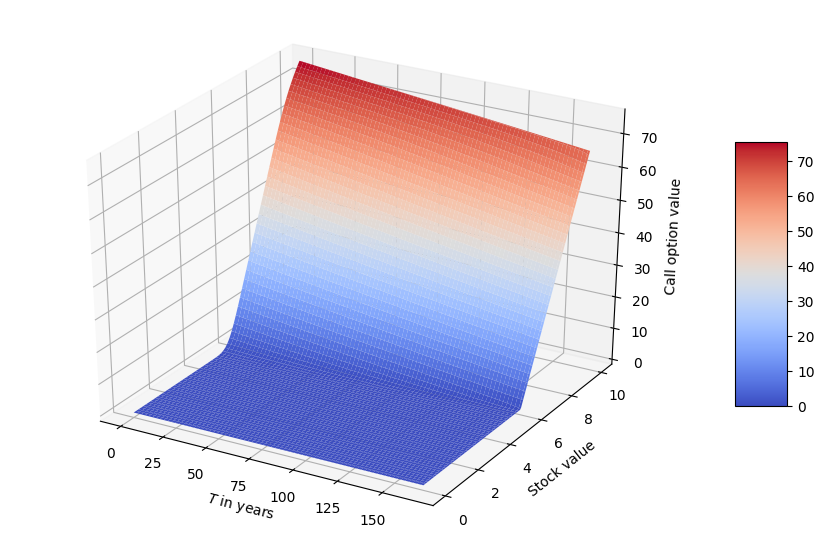

In [ ]:
fig = plt.figure(figsize = (11,7),dpi = 100)
ax = plt.subplot(projection = '3d')
X, Y = np.meshgrid(T, x) 
surf = ax.plot_surface(Y, X, V.T,  rstride = 2, cstride = 2, cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$T$ in years')
ax.set_ylabel('Stock value')
ax.set_zlabel("Call option value ")

plt.show()

In [ ]:
leo = np.arange(1,20,3)
print(leo)

[ 1  4  7 10 13 16 19]


### Conclusion

#### Consistency, Stability and Convergence


When discussing effectiveness of different finite difference methods, we should consider three fundamental properties, which are **consistency**, **stability**, and **convergence**. Before that, we have to notice that though numerical method is good for solving PDE, it also brings the **truncation error**. Two important sources of error are the truncation error in discretization of stock price and time space.

- **stability**: A finite difference scheme is said to be stable if the difference between numerical solution and the true solution will not grow unboundedly as dS and dt approach zero. 
- **consistency**: A finite difference scheme is consistent if the difference between PDE and finite differential equation vanishes as dS and dt approach zero. That is, the truncation error tends to 0 as the mesh get infinitely finer.
- **convergence**: A finite difference scheme is said to be convergent if solutions derived from a finite difference equation converge point-wise to the true solutions of the original PDE as dS and dt approach zero.

----

**APPENDIX:** Lax Theorem


The Lax equivalence theorem states that, given a well posed linear initial value problem and a consistent finite difference scheme, stability is the necessary and sufficient condition for convergence.

------

#### Instability of the explicit method

Explicit method of the finite difference scheme suffers from instability problems.

If we set a **large volatility**, e.g. $σ = 0.2$, the explicit method might not be stable. As following, we have oscillating option price as our expected.

In [ ]:
## Defining parameters
K, r, sigma, T = baseline_values_num()
sigma = 0.2
N, M = 150,150
import scipy
t, S, V = price_call_explicit(K, T, r, sigma, N, M)

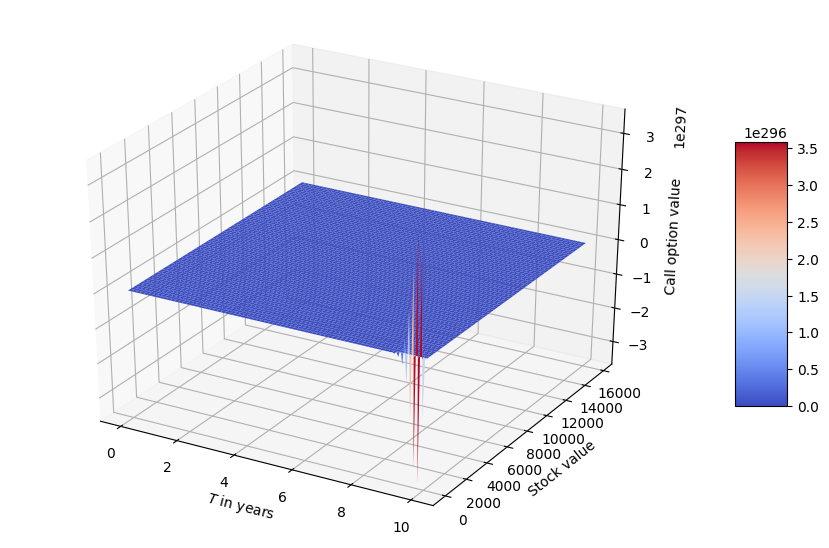

In [ ]:
fig = plt.figure(figsize = (11,7),dpi = 100)
ax = plt.subplot(projection = '3d')
X, Y = np.meshgrid(t, S) 
surf = ax.plot_surface(X, Y, V,  rstride = 2, cstride = 2, cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$T$ in years')
ax.set_ylabel('Stock value')
ax.set_zlabel("Call option value ")

plt.show()

#### Compare implicit, explicit and convergence with the real solution


In [ ]:
K = 100  #strike price
r = 0.01 # risk-free interest
sigma = 0.02 # volatility
T = 10 # expiration time
# N, M = 256,256
N = M = 256

In [ ]:
import time

start_time =  time.time()
# Numerical solution Explicit:
t, S, V = price_call_explicit(K, T, r, sigma, N, M)
V_exp = V
start_time =  time.time()
print("The explicit took:", time.time() - start_time)
## Numerical solution Implicit:
t1, S1, V1, offset = price_call_implicit(K, T, r, sigma, N+1, M+1)
V_imp = V1.T

start_time =  time.time()
# Analytical solution
S_min = 0
S_max=K*np.exp(8*sigma*np.sqrt(T)) 
T_range = np.linspace(0,T,N+1)
S = np.linspace(S_min,S_max,M+1)
print("The implicit took:", time.time() - start_time)

start_time =  time.time()
# print("shapes:", T_range.shape, S.shape)
calls = np.zeros(
  (len(T_range), len(S)))
for i in range(len(T_range)):
  for j in range(len(S)):
    calls[i,j] = call(S[j], K, (T-T_range[i]), r, sigma)
print("The Analytical solution took:", time.time() - start_time)

calls[30,0]

V_anal = calls

The explicit took: 6.723403930664062e-05
The implicit took: 0.0004451274871826172


<ipython-input-42-36588bae8352>:8: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/K) + (r + sigma**2/2)*Tau) / (sigma*np.sqrt(Tau))


The Analytical solution took: 13.657341957092285


<ipython-input-42-36588bae8352>:8: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S/K) + (r + sigma**2/2)*Tau) / (sigma*np.sqrt(Tau))


In [ ]:
q = -1
# print(V_imp[:,q])
# print(V_exp[:,q])
# print(V_imp[:,q] - V_exp[:,q])
# print(V_imp[q,:] - V_exp[q,:])


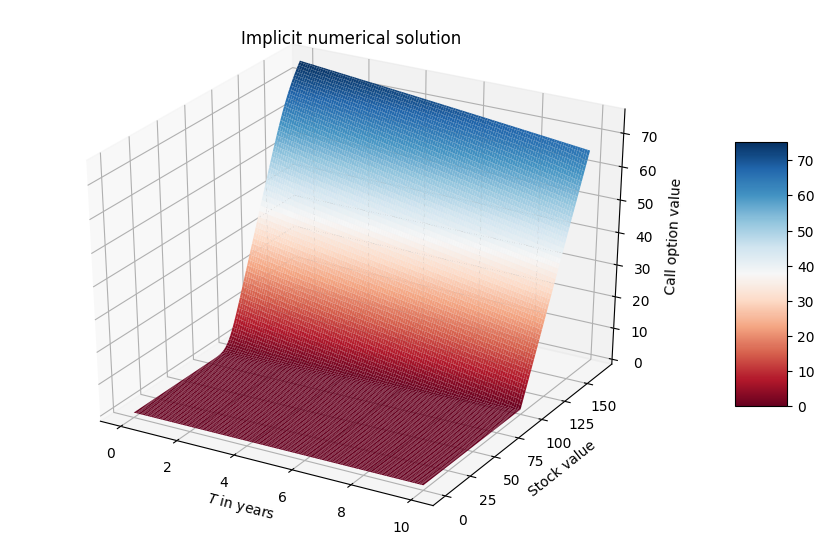

In [ ]:
fig = plt.figure(figsize = (11,7),dpi = 100)
ax = plt.subplot(projection = '3d')
# q = -1
X, Y = np.meshgrid(t1, S1)

surf1 = ax.plot_surface(X, Y, V_imp.T,  rstride = 2, cstride = 2, cmap=cm.RdBu)
fig.colorbar(surf1, shrink=0.5, aspect=5)

plt.title("Implicit numerical solution")
ax.set_xlabel('$T$ in years')
ax.set_ylabel('Stock value')
ax.set_zlabel("Call option value ")

plt.show()

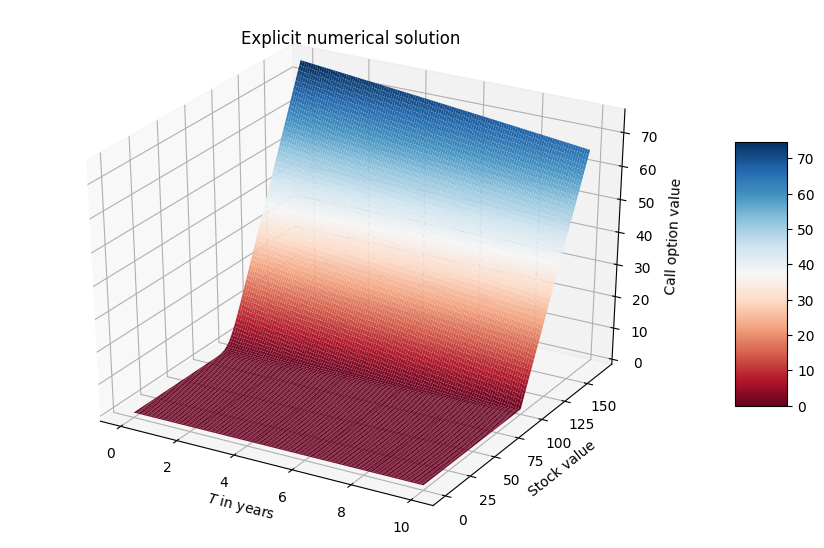

In [ ]:
fig = plt.figure(figsize = (11,7),dpi = 100)
ax = plt.subplot(projection = '3d')
X, Y = np.meshgrid(t, S) 
surf1 = ax.plot_surface(X, Y, V_exp.T,  rstride = 2, cstride = 2, cmap=cm.RdBu)
fig.colorbar(surf1, shrink=0.5, aspect=5)

plt.title("Explicit numerical solution")
ax.set_xlabel('$T$ in years')
ax.set_ylabel('Stock value')
ax.set_zlabel("Call option value ")

plt.show()

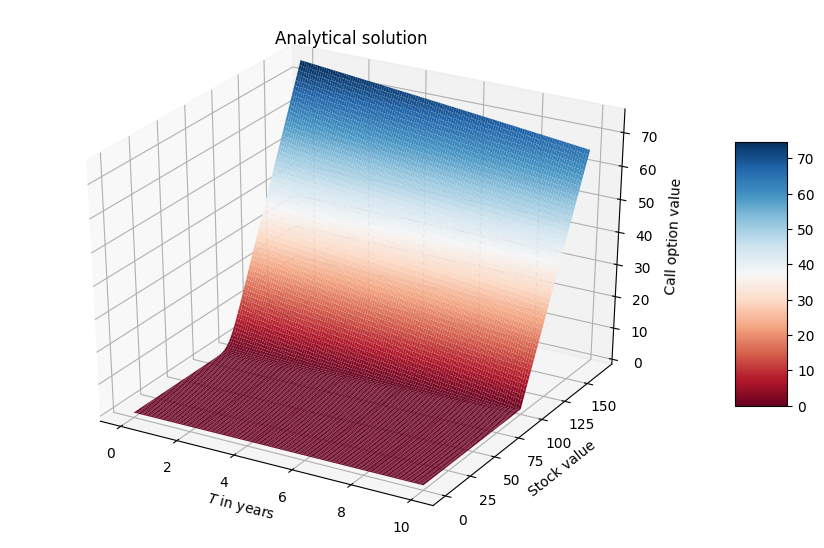

In [ ]:
fig = plt.figure(figsize = (11,7),dpi = 100)
ax = plt.subplot(projection = '3d')
X, Y = np.meshgrid(T_range, S) 
surf1 = ax.plot_surface(X, Y, V_anal.T,  rstride = 2, cstride = 2, cmap=cm.RdBu)
fig.colorbar(surf1, shrink=0.5, aspect=5)

plt.title("Analytical solution")
ax.set_xlabel('$T$ in years')
ax.set_ylabel('Stock value')
ax.set_zlabel("Call option value ")

plt.show()

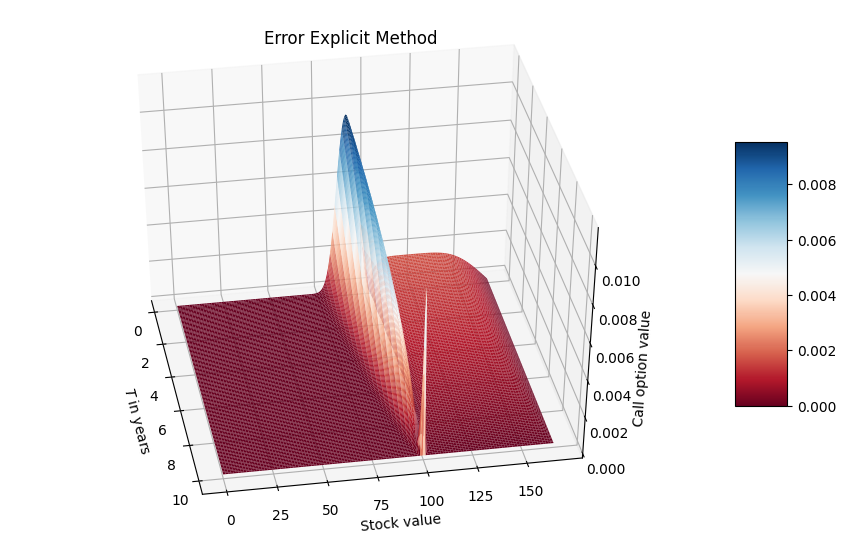

In [ ]:
# Difference : 
V_diff = np.abs(V_anal - V_exp)

fig = plt.figure(figsize = (11,7),dpi = 100)
ax = plt.subplot(projection = '3d')
X, Y = np.meshgrid(T_range, S) 
surf1 = ax.plot_surface(X, Y, V_diff.T,  rstride = 2, cstride = 2, cmap=cm.RdBu)
fig.colorbar(surf1, shrink=0.5, aspect=5)

plt.title("Error Explicit Method")
ax.set_xlabel('$T$ in years')
ax.set_ylabel('Stock value')
ax.set_zlabel("Call option value ")
ax.view_init(40, -10) # this function rotates the 3d plot

plt.show()

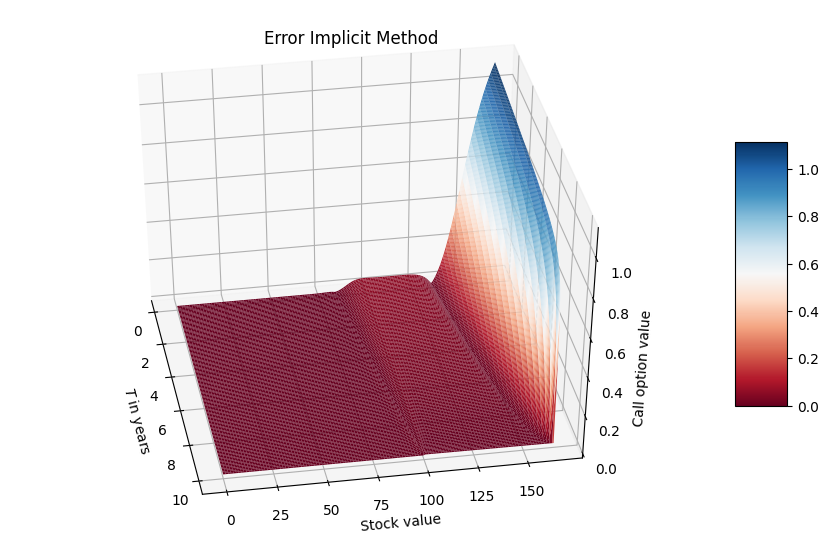

In [ ]:
# Difference : 
q = -1
V_diff = np.abs(V_anal - V_imp)

fig = plt.figure(figsize = (11,7),dpi = 100)
ax = plt.subplot(projection = '3d')
X, Y = np.meshgrid(T_range, S[:q]) 
surf1 = ax.plot_surface(X, Y, V_diff.T[:q],  rstride = 2, cstride = 2, cmap=cm.RdBu)
fig.colorbar(surf1, shrink=0.5, aspect=5)

plt.title("Error Implicit Method")
ax.set_xlabel('$T$ in years')
ax.set_ylabel('Stock value')
ax.set_zlabel("Call option value ")
ax.view_init(40, -10) # this function rotates the 3d plot

plt.show()

## Applications

In [ ]:
#!pip install yfinance
import pandas_datareader.data as web
import yfinance as yf
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame

ModuleNotFoundError: ignored

In [ ]:
stock = 'SPY'
expiry = '12-18-2022'
strike_price = 370

today = datetime.now()
one_year_ago = today.replace(year=today.year-1)

df = yf.download('MSFT', start = one_year_ago, end=today)
df = df.sort_values(by="Date")
df = df.dropna()
df = df.assign(close_day_before=df.Close.shift(1))
df['returns'] = ((df.Close - df.close_day_before)/df.close_day_before)
sigma = np.sqrt(252) * df['returns'].std()
sigma